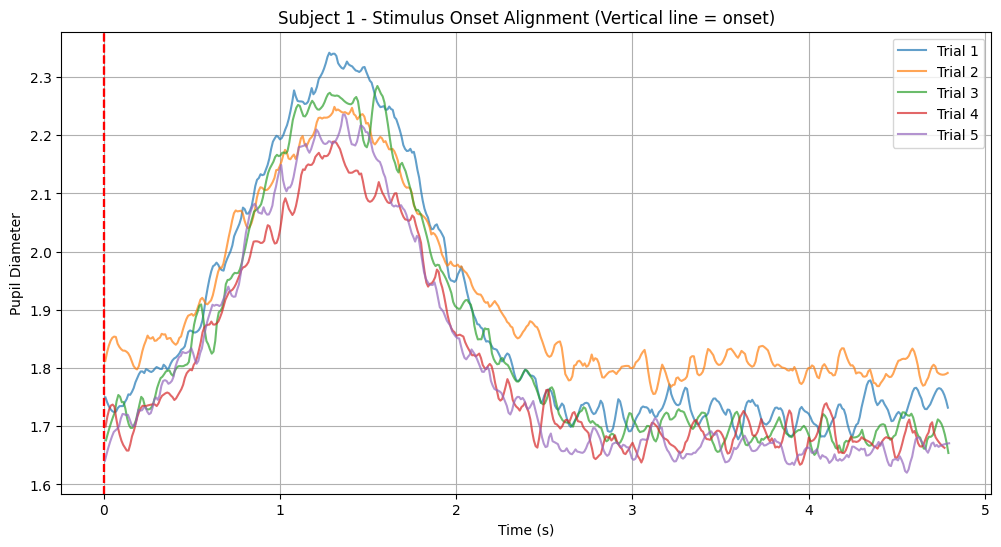

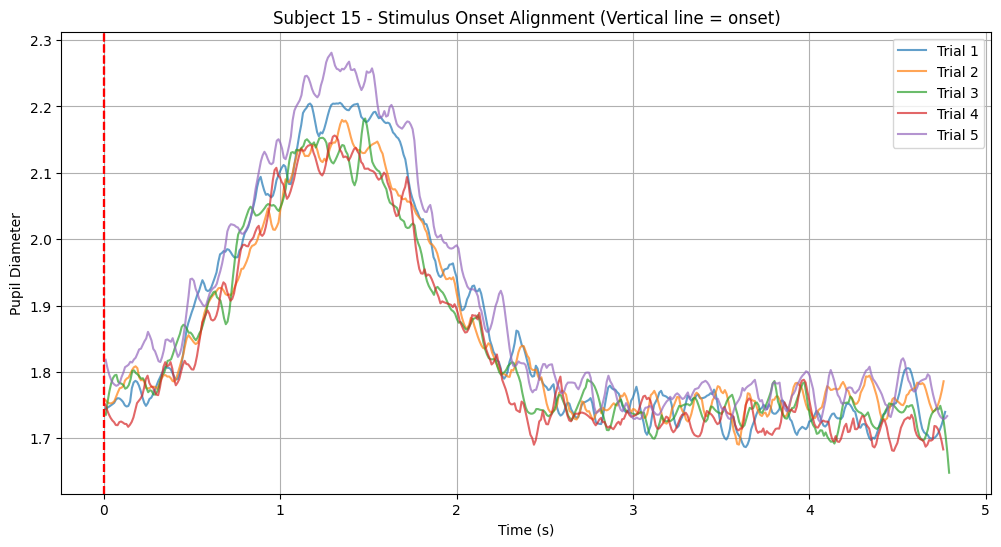

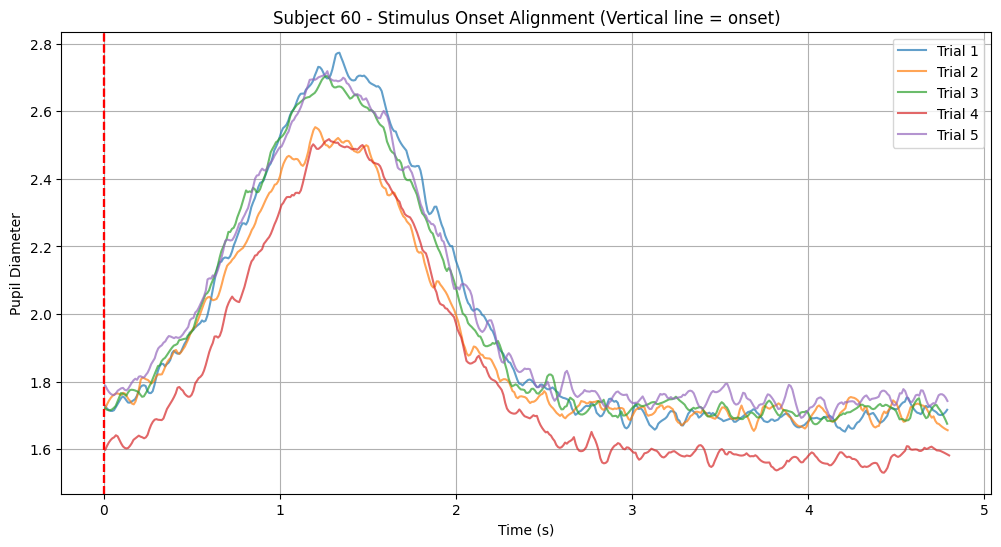

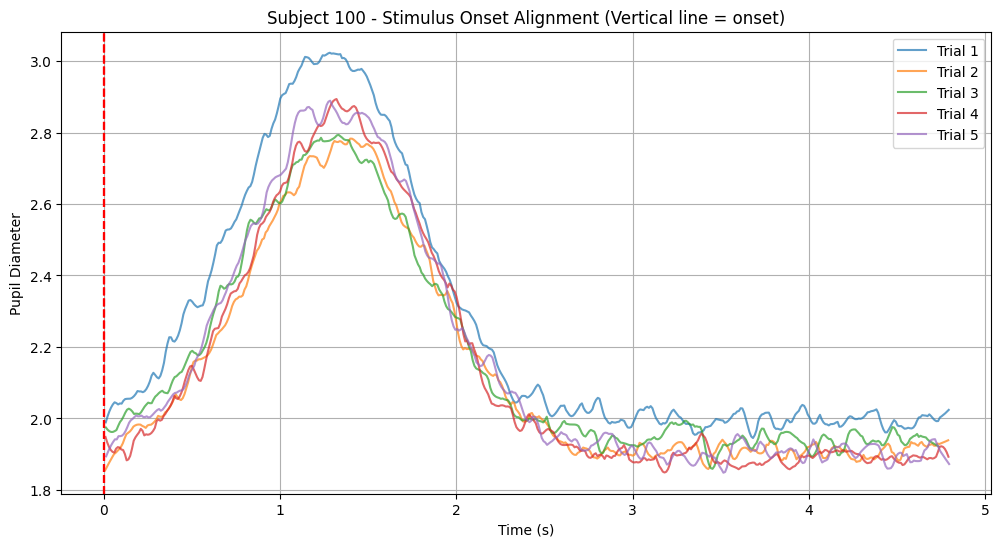

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# =================== CONFIG ===================
DATA_CSV = "pupil_resampled_100Hz_clean.csv"
SUBJECT_TO_PLOT = [1,15,60,100]   # change for other subjects
N_TRIALS = 5          # how many trials to plot
# ==============================================
data = pd.read_csv(DATA_CSV)


def vertical_line_plot(SUBJECT_TO_PLOT, N_TRIALS):
    df_subj = data[data["subjectID"] == SUBJECT_TO_PLOT]

# Pick first N trials
    trials = df_subj["trialID"].unique()[:N_TRIALS]

    plt.figure(figsize=(12, 6))
    for trial in trials:
        df_trial = df_subj[df_subj["trialID"] == trial]
        time = df_trial["time"]
        pupil = df_trial["pupil_clean"] 

        # Plot pupil trace
        plt.plot(time, pupil, label=f"Trial {trial}", alpha=0.7)

        # Since we don't have stim_onset in metadata, assume onset = 0 for each trial
        plt.axvline(0, color="red", linestyle="--", alpha=0.7)

    plt.xlabel("Time (s)")
    plt.ylabel("Pupil Diameter")
    plt.title(f"Subject {SUBJECT_TO_PLOT} - Stimulus Onset Alignment (Vertical line = onset)")
    plt.legend()
    plt.grid(True)
    plt.show()
for _ in SUBJECT_TO_PLOT:    
    vertical_line_plot(_, N_TRIALS)





In [2]:
trial_count=data.groupby('subjectID')['trialID'].nunique().reset_index()
trial_count.columns=['subjectID','n_trials']
print(trial_count.head())
trial_count.to_csv('trial_count.csv',index=False)

   subjectID  n_trials
0          1        17
1          2        19
2          3        20
3          4        18
4          5        20


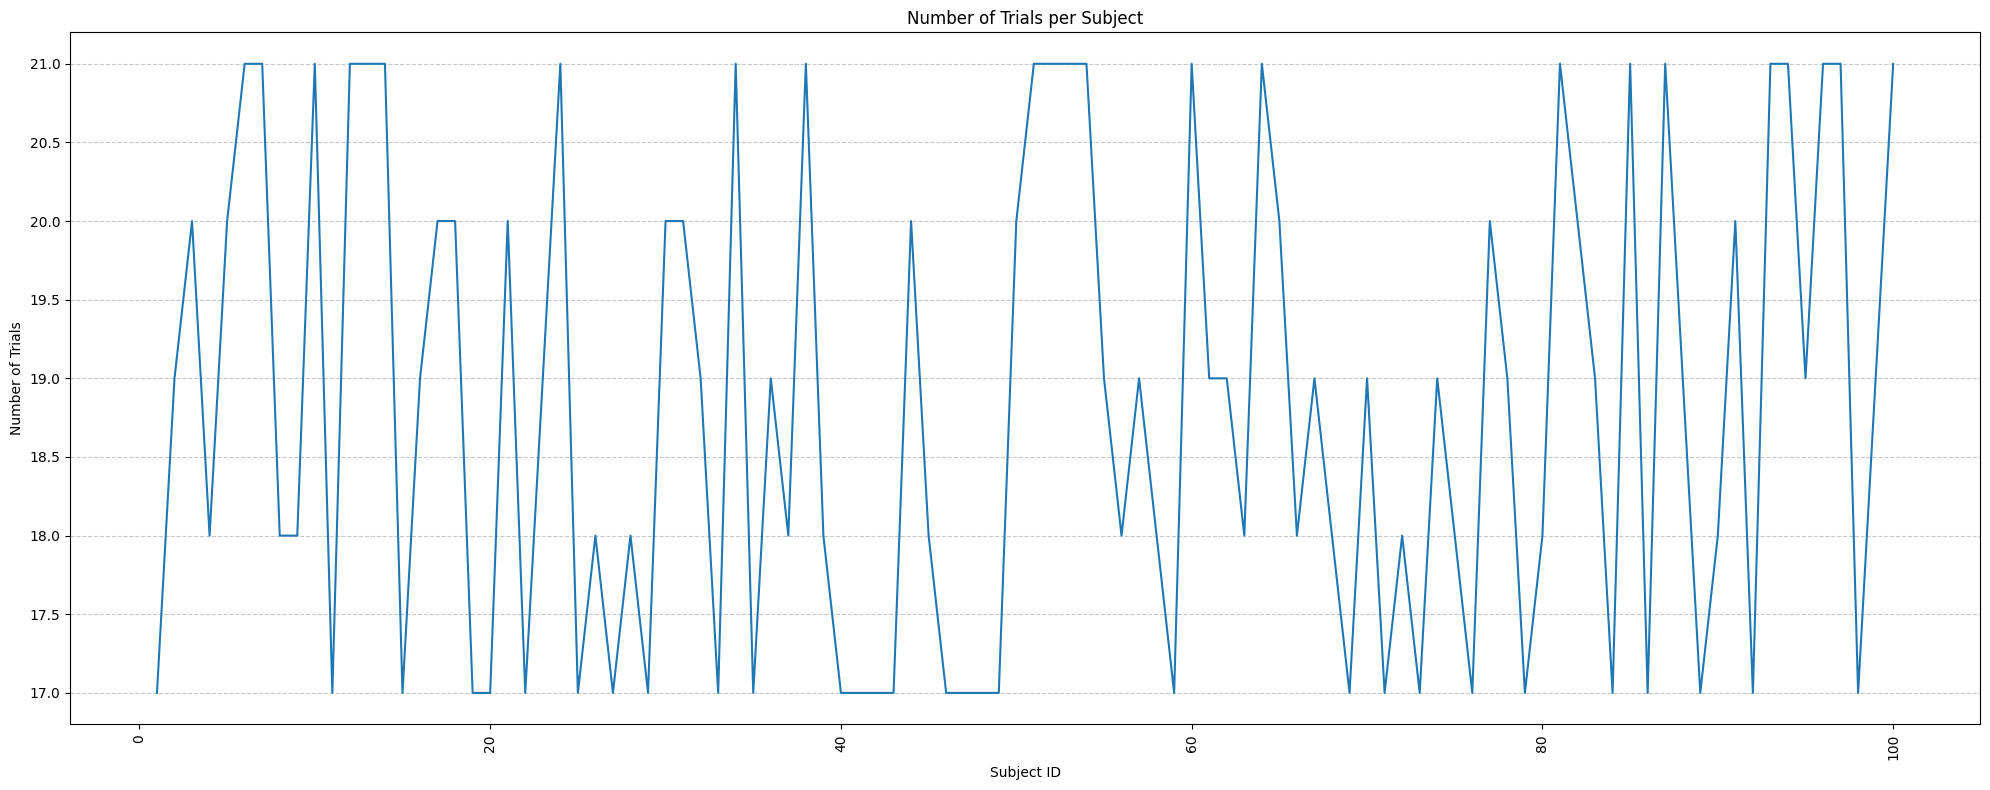

In [15]:
plt.figure(figsize=(20, 8))
plt.plot(trial_count['subjectID'], trial_count['n_trials'])
plt.xlabel('Subject ID')
plt.ylabel('Number of Trials')
plt.title('Number of Trials per Subject')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

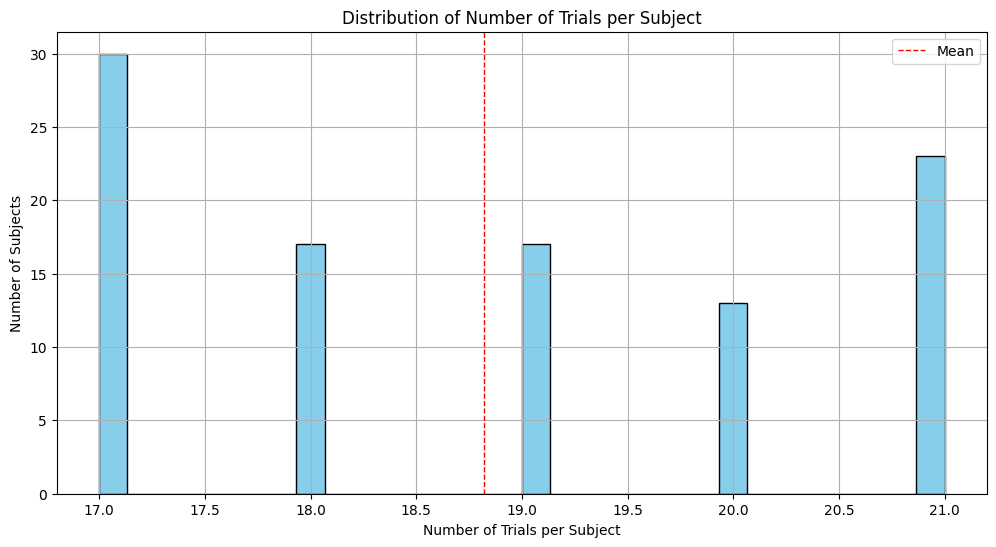

In [3]:
plt.figure(figsize=(12, 6))
plt.hist(trial_count['n_trials'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Number of Trials per Subject')
plt.ylabel('Number of Subjects')
plt.title('Distribution of Number of Trials per Subject')
plt.axvline(trial_count['n_trials'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.legend()
plt.grid(True)
plt.show()  

In [4]:
ensemble_avg = (
    data.groupby(["subjectID", "time"])["pupil_clean"]
    .mean()
    .reset_index()
)

# Show first few rows
print(ensemble_avg.head())

# Optionally save
ensemble_avg.to_csv("ensemble_avg_per_subject.csv", index=False)

   subjectID      time  pupil_clean
0          1  0.007314     1.640986
1          1  0.008180     1.736604
2          1  0.008302     1.752694
3          1  0.008683     1.763810
4          1  0.008979     1.848495


In [5]:
def plot_ensemble_avg(SUBJECT_TO_PLOT):
    df_subj_avg = ensemble_avg[ensemble_avg["subjectID"] == SUBJECT_TO_PLOT]

    plt.figure(figsize=(12, 6))
    plt.plot(df_subj_avg["time"], df_subj_avg["pupil_clean"], label=f"Subject {SUBJECT_TO_PLOT}", color="blue")
    plt.axvline(0, color="red", linestyle="--", alpha=0.7)
    plt.xlabel("Time (s)")
    plt.ylabel("Average Pupil Diameter")
    plt.title(f"Subject {SUBJECT_TO_PLOT} - Ensemble Average Pupil Response")
    plt.legend()
    plt.grid(True)
    plt.show()

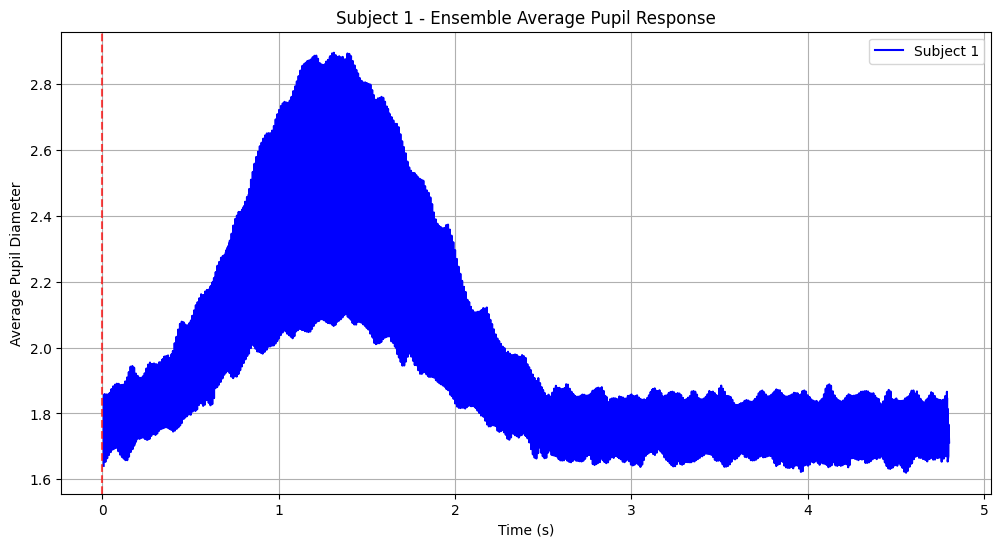

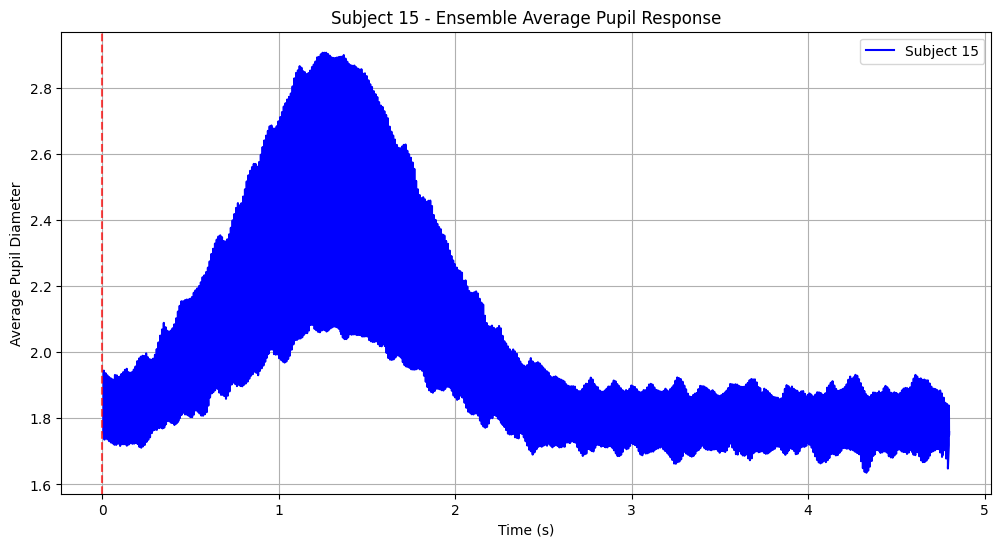

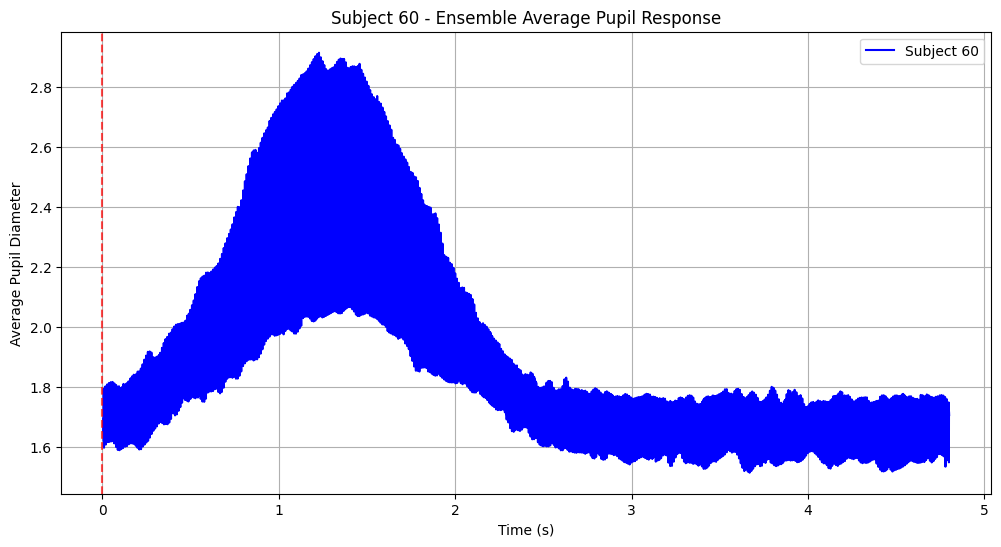

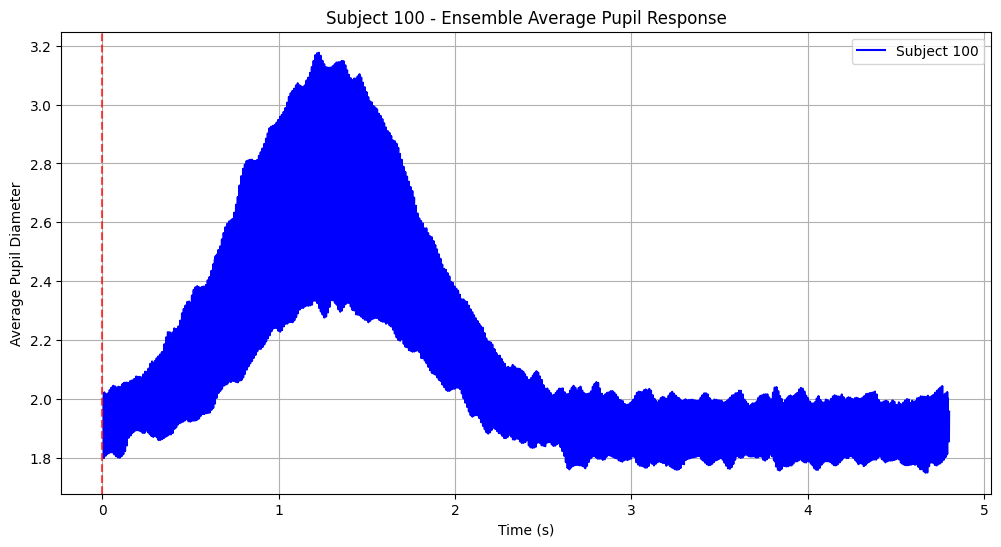

In [6]:
for _ in SUBJECT_TO_PLOT:
    plot_ensemble_avg(_)

In [8]:
Baseline_win=[0,0.2]
mask=(data['time']>=Baseline_win[0]) & (data['time']<=Baseline_win[1])
baseline=(
    data.loc[mask].groupby(['subjectID','trialID'])['pupil_clean']
    .mean().reset_index().rename(columns={'pupil_clean':'baseline'})
)

df_bc=data.merge(baseline,on=['subjectID','trialID'],how='left')
df_bc['pupil_bc']=df_bc['pupil_clean']-df_bc['baseline']
df_bc.to_csv('pupil_resampled_100Hz_clean_bc.csv',index=False)

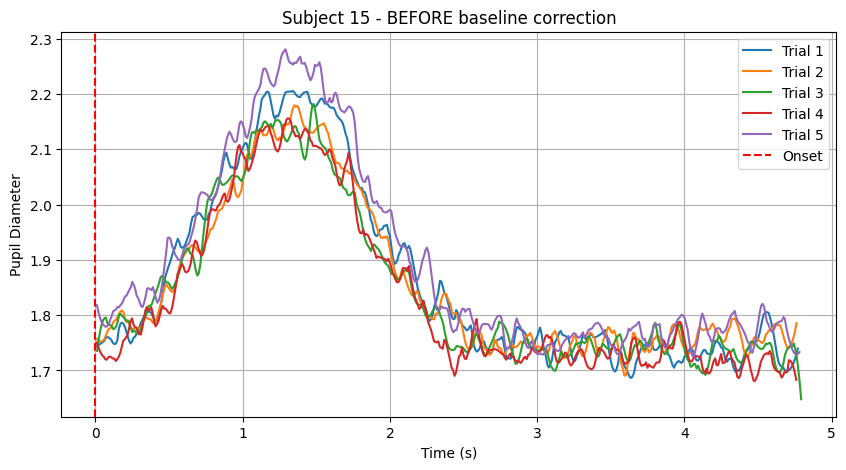

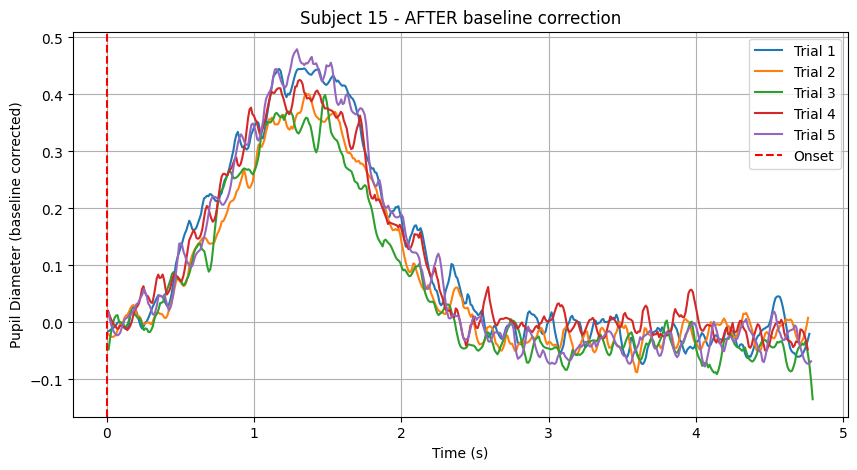

In [10]:
SUBJECT_TO_PLOT = 15  # Change to any subject ID you want to plot

df_subj = data[data["subjectID"] == SUBJECT_TO_PLOT]
trials = df_subj["trialID"].unique()[:5]
value_col = "pupil_clean"  # or "pupil" if you want raw data

plt.figure(figsize=(10, 5))
for t in trials:
    dft = df_subj[df_subj["trialID"] == t]
    plt.plot(dft["time"], dft[value_col], label=f"Trial {t}")
plt.axvline(0, color="red", linestyle="--", label="Onset")
plt.title(f"Subject {SUBJECT_TO_PLOT} - BEFORE baseline correction")
plt.xlabel("Time (s)")
plt.ylabel("Pupil Diameter")
plt.legend()
plt.grid(True)
plt.show()

# 6. Plot after baseline correction
df_subj_bc = df_bc[df_bc["subjectID"] == SUBJECT_TO_PLOT]

plt.figure(figsize=(10, 5))
for t in trials:
    dft = df_subj_bc[df_subj_bc["trialID"] == t]
    plt.plot(dft["time"], dft["pupil_bc"], label=f"Trial {t}")
plt.axvline(0, color="red", linestyle="--", label="Onset")
plt.title(f"Subject {SUBJECT_TO_PLOT} - AFTER baseline correction")
plt.xlabel("Time (s)")
plt.ylabel("Pupil Diameter (baseline corrected)")
plt.legend()
plt.grid(True)
plt.show()




In [11]:
ensemble_bc = (
    df_bc.groupby(["subjectID", "time"])["pupil_bc"]
    .mean().reset_index()
)
ensemble_bc.to_csv("ensemble_avg_per_subject_bc.csv", index=False)

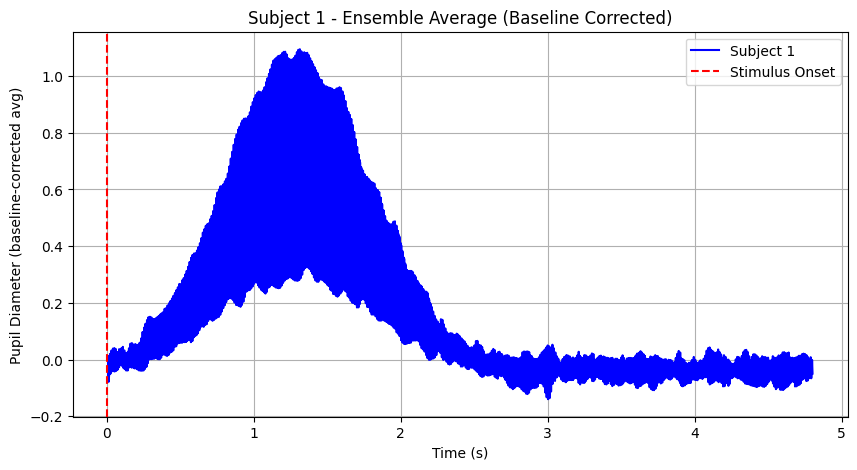

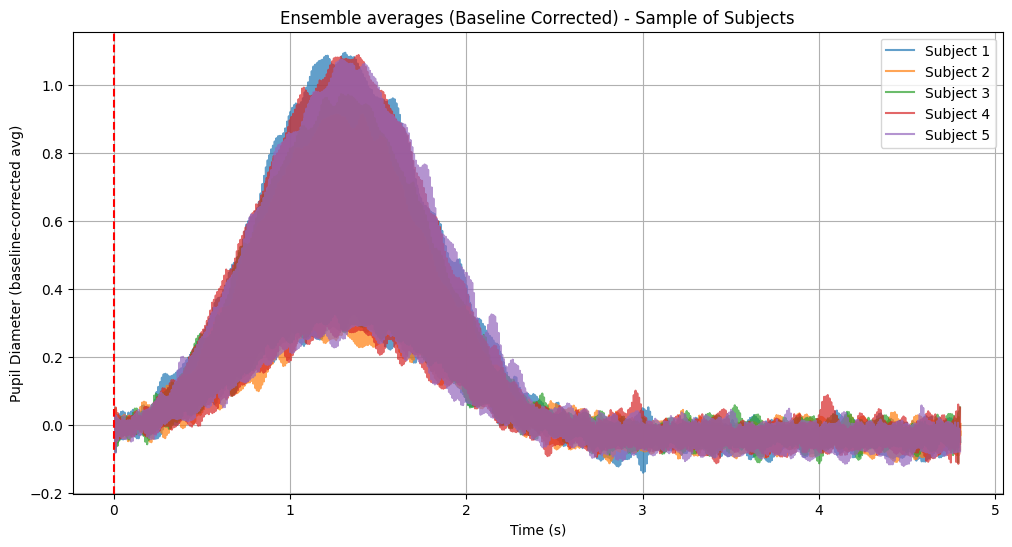

In [ ]:
import matplotlib.pyplot as plt

# ====== Plot one subject’s ensemble average ======
SUBJECT_TO_PLOT = 1  # change to any subject ID
df_subj = ensemble_bc[ensemble_bc["subjectID"] == SUBJECT_TO_PLOT]

plt.figure(figsize=(10, 5))
plt.plot(df_subj["time"], df_subj["pupil_bc"], color="blue", label=f"Subject {SUBJECT_TO_PLOT}")
plt.axvline(0, color="red", linestyle="--", label="Stimulus Onset")
plt.xlabel("Time (s)")
plt.ylabel("Pupil Diameter (baseline-corrected avg)")
plt.title(f"Subject {SUBJECT_TO_PLOT} - Ensemble Average (Baseline Corrected)")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
for sid in ensemble_bc["subjectID"].unique()[:5]:  # first 5 subjects
    df_subj = ensemble_bc[ensemble_bc["subjectID"] == sid]
    plt.plot(df_subj["time"], df_subj["pupil_bc"], label=f"Subject {sid}", alpha=0.7)
plt.axvline(0, color="red", linestyle="--")
plt.xlabel("Time (s)")
plt.ylabel("Pupil Diameter (baseline-corrected avg)")
plt.title("Ensemble averages (Baseline Corrected) - Sample of Subjects")
plt.legend()
plt.grid(True)
plt.show()
